In [9]:
# GAUSS-SEIDEL's Iterative Method - CaptainOrb (New Version)
import numpy as np

def isDiagonallyDominant(A):
    length = len(A)

    for i in range(length):
        pivot = 0
        non_pivot = 0
        
        for j in range(length):
            if i==j: pivot = abs(A[i][j])
            else: non_pivot += abs(A[i][j])
        
        # if the pivot is not dominant
        if pivot <= non_pivot:
            return False
    
    # if all pivot elements are dominant
    return True

def gaussSeidel(A, B, X, epsilon, maxIter = 999, iter = 1):
    # stop if maxIter had been reached
    if iter > maxIter: return
    
    length = len(A)
    
    # keep the values of X before iteration
    X_old = X.copy()
    
    # iterate all rows
    for j in range(0, length):
        b = B[j]
        # subtract b with all other entry
        for i in range(0, length):
            if (j != i): b -= A[j][i]*X[i]
        # update value of x
        X[j] = b/A[j][j]
        
    print(X)
        
    # calculate the error
    for j in range(0, length):
        # if the error exceeds tolerance
        error = np.sqrt(np.dot(X-X_old, X-X_old))
        print("Error:", error)
        if error >= epsilon:
            gaussSeidel(A, B, X, epsilon, maxIter, iter+1)
            return
    
    # if the error satisfied tolerance
    print("Converged X:", X)

# USE THE GAUSS SEIDEL!

# Given: (with known correct answer of x = [-1, 2, -3])
A = [[4, -2, 1],
    [1, -4, 2],
    [1, -2, 4]]

B = [-11,
     -15,
     -17]

epsilon = 0.01

# Start
if (isDiagonallyDominant(A)):
    gaussSeidel(A, B, np.zeros(len(A)), epsilon)
else:
    print("Not diagonally dominant!")

[-2.75     3.0625  -2.03125]
Error: 4.589921874335118
[-0.7109375   2.55664062 -2.79394531]
Error: 2.2350332717637813
[-0.77319336  2.159729   -2.97683716]
Error: 0.44143408818359736
[-0.92592621  2.03009987 -3.00346851]
Error: 0.20208974481656608
[-0.98408294  2.00224501 -3.00285676]
Error: 0.0644862198860688
[-0.99816331  1.99903079 -3.00094378]
Error: 0.014568714910667732
[-1.00024866  1.99946595 -3.00020486]
Error: 0.002254785012209548
Error: 0.002254785012209548
Error: 0.002254785012209548
Converged X: [-1.00024866  1.99946595 -3.00020486]


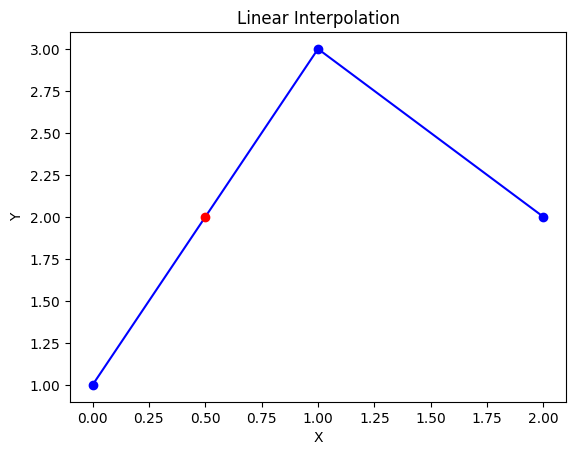

In [10]:
# LINEAR INTERPOLATION - CaptainOrb
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

f = interp1d(x, y)
x_target = 0.5

plt.title("Linear Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "-ob") # create blue line with dots
plt.plot(x_target, f(x_target), "or") # create red dot

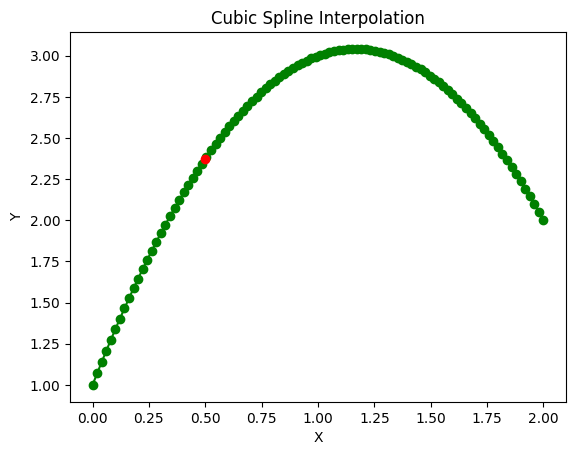

In [11]:
# CUBIC SPLINE INTERPOLATION - CaptainOrb
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

f = CubicSpline(x, y)
x_target = 0.5

# split x into 100 connected dots from 0 to 2
x_dotted = np.linspace(0, 2, 100)
y_dotted = f(x_dotted)

plt.title("Cubic Spline Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_dotted, y_dotted, "-og") # create green line with dots
plt.plot(x_target, f(x_target),  "or") # create red dot

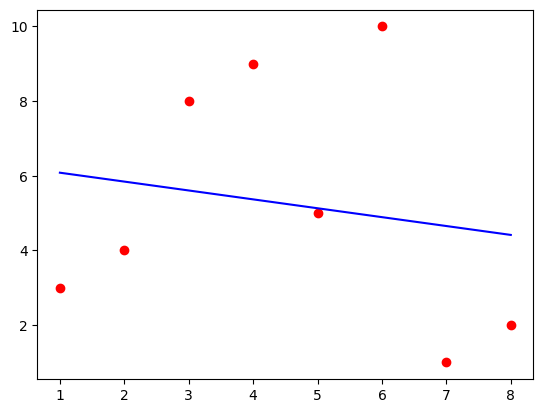

In [12]:
# LEAST SQUARE REGRESSION - CaptainOrb
import numpy as np
import matplotlib.pyplot as plt

# Reference:
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html
# help(np.linalg.lstsq)

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([3, 4, 8, 9, 5, 10, 1, 2])

# make A become tuplets of (x, 1), then transpose
A = np.vstack((x, np.ones(len(x)))).T

# np.newaxis adds new dimension to y
# thus, the shape of y_new will be (len(y), 1)
y_new = y[:, np.newaxis]

# pinv = (AT A)^-1 * AT
# beta = pinv * Y
pinv = np.linalg.pinv(A)
beta = np.dot(pinv, y_new)

# beta[0] = m, beta[1] = c
# f = mx + c
f = beta[0]*x + beta[1]

plt.plot(x, y, "or") # create actual red dots
plt.plot(x, f, "-b") # create blue regression line

C:\Users\Wesley\AppData\Local\Temp\ipykernel_28224\3182561634.py:13: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)
C:\Users\Wesley\AppData\Local\Temp\ipykernel_28224\3182561634.py:13: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)


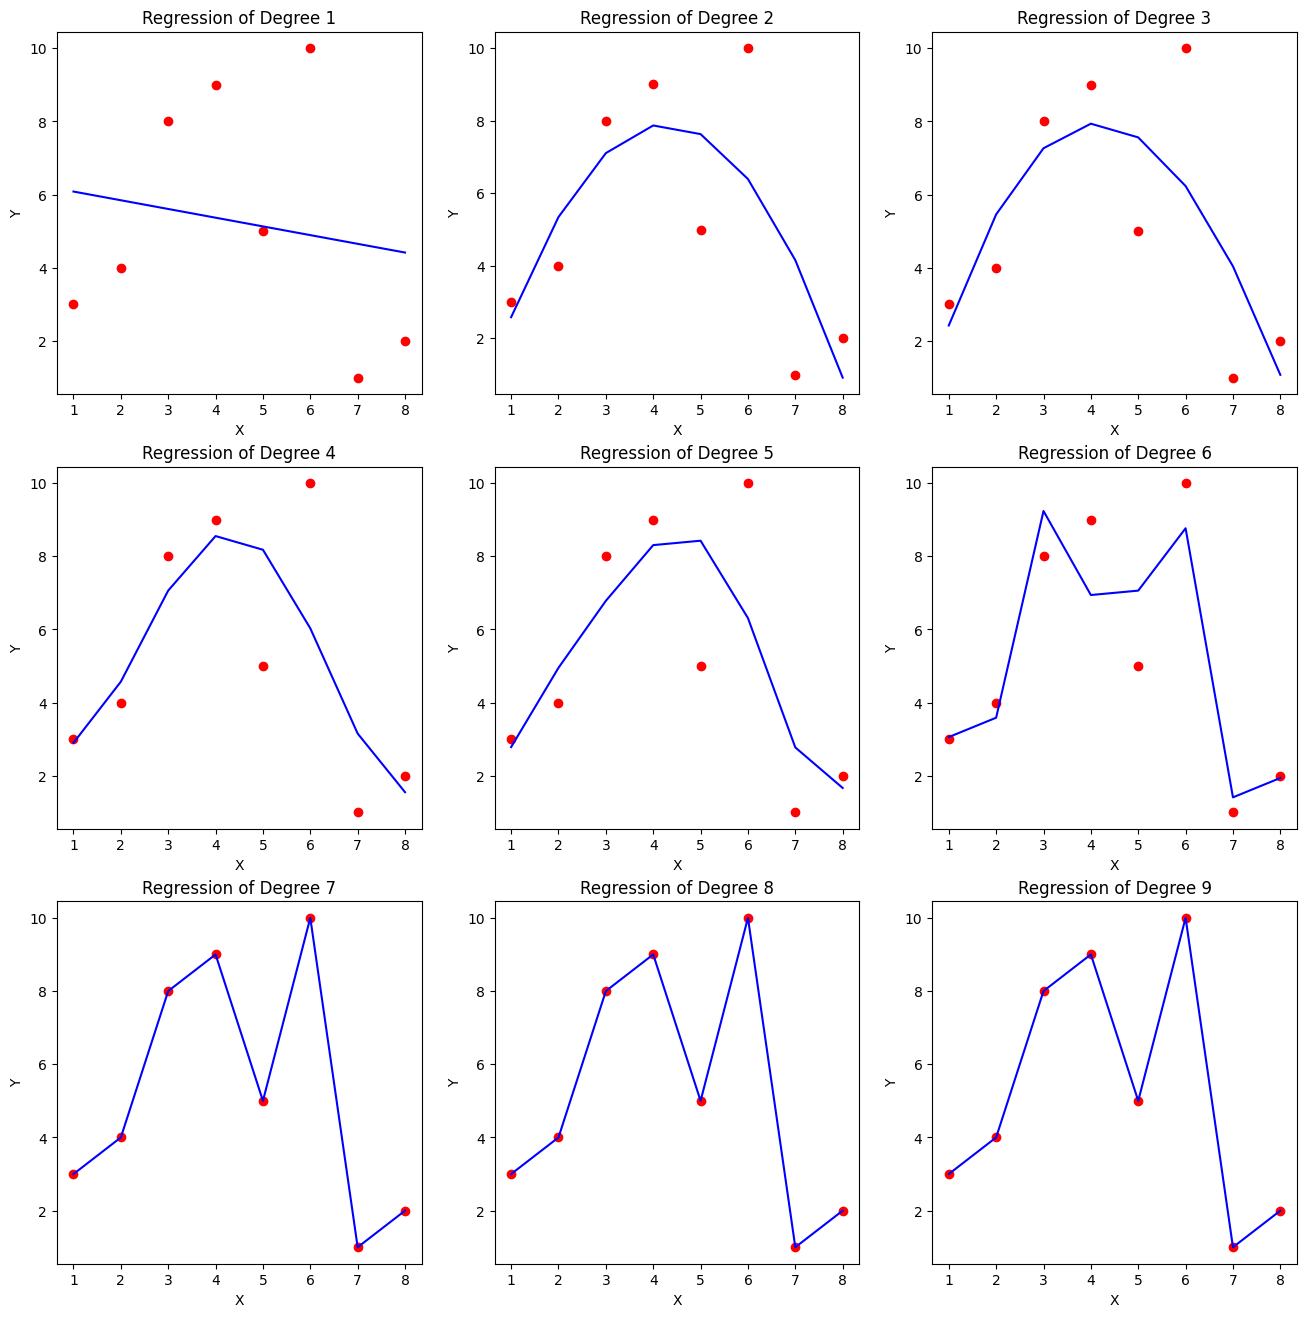

In [13]:
# POLYNOMIAL REGRESSION - CaptainOrb
import numpy as np
import matplotlib.pyplot as plt

# Given Data:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([3, 4, 8, 9, 5, 10, 1, 2])

# Image Size
plt.figure(figsize=(16, 16))

for degree in range (1, 10):
    coeff = np.polyfit(x, y, degree)
    plt.subplot(3, 3, degree)
    plt.title("Regression of Degree " + str(degree))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(x, y, "or") # actual points
    plt.plot(x, np.polyval(coeff, x), "-b") # regression line

In [14]:
# Root Finding - Bisection Method
import numpy as np

def f(x):
    return x**2 - 6

def bisection_method(x1, x2, tolerance = 0.001):
    if(np.sign(f(x1)) == np.sign(f(x2))):
        print("Invalid Coordinate")
        return

    x_new = (x1+x2)/2
    
    if (np.abs(f(x_new)) < tolerance):
        print("Root is ", x_new)

    elif (np.sign(f(x_new)) == np.sign(f(x1))):
        bisection_method(x_new, x2)
    
    elif (np.sign(f(x_new)) == np.sign(f(x2))):
        bisection_method(x1, x_new)

# initial guess
bisection_method(2, 3)

Root is  2.449462890625


In [15]:
# Root Finding - Newton Raphson
import numpy as np

def f(x):
    return x**2 - 6

# g(x) is the first derivative of f(x)
def g(x):
    return 2*x

def newton_raphson(x0, tolerance = 0.001):
    x1 = x0 - (f(x0)/g(x0))
    if (np.abs(f(x1)) < tolerance):
        print("Root is ", x1)
    else:
        newton_raphson(x1)

# initial guess
newton_raphson(30)

Root is  2.449628134937141


In [16]:
# RIEMANN INTEGRAL
import numpy as np

# define the function
def f(x):
    return x**2

# lower limit, upper limit, amount of points
x1 = 0
x2 = 8
n = 5

# calculate box width
# note: n-1 is the amount of boxes
width = (x2-x1)/(n-1)

# find coordinates
x = np.linspace(x1, x2, n)
y = f(x)

# sum of all the area of boxes from 0 to n-2
left_riemann = width * sum(y[0:n-1])

# sum of all the area of boxes from 1 to n-1
right_riemann = width * sum(y[1:n])

# calculate middle values for mid riemann
x_mid = (x[0:n-1] + x[1:n])/2
y_mid = f(x_mid)
mid_riemann = width * sum(y_mid)

# Trapezoid
# Area: (left + 2*mids + right)*width/2
trapezoid = (y[0] + 2*sum(y[1:n-1]) + y[n-1]) * width/2

# compare the results
print("Left:", left_riemann)
print("Right:", right_riemann)
print("Mid:", mid_riemann)
print("Trapezoid:", trapezoid)
print("Actual Result: 170.667")

Left: 112.0
Right: 240.0
Mid: 168.0
Trapezoid: 176.0
Actual Result: 170.667
